## Exploring Sub-Regional Happiness Trends from 2008 to 2022

Sherwin Shi, Jack McColm-De Jong, Christopher Hong, Omer Randhawa

## Data Description

The dataset that we chose for this project is the World Happiness Report 2023, which contains indices related to happiness and wellbeing by country from 2008 to 2022. The dataset consists of 11 variables: Country name, year, Life Ladder, Log GDP per capita, Social support, Healthy life expectancy at birth, Freedom to make life choices, Generosity, Perceptions of corruption, Postive affect, and Negative affect.
* **Life Ladder** is a current life evaluation scale from 0 to 10 with 10 being the best possible life and 0 being the worst possible. This data was from the Gallup World Poll (GWP) who asked individuals to evaluate their current life. The values for this variable are calculated by gathering 1000 responses from each country annually and are weighted to make national averages that are representative of each country's repsective population.

* **Log GDP per capita** is in terms of Purchasing Power Parity (PPP) adjusted to constant 2017 international dollars. Values for this variable were obtained from the World Development Indicators (WDI) taken by the World Bank (version 17, metadata last updated on January 22, 2023). However, since the GDP data for 2022 is not avaliable at the moment, the World Happiness Report 2023 determined the GDP values for 2022 by using a time series country-specific forecast from the OECD Economic Outlook No. 112 (November 2022) or, if missing, from the World Bank’s Global Economic Prospects (last updated: January 10, 2023).

* **Social Support** is the national average of the binary responses (0=no, 1=yes) to the Gallup World Poll (GWP) question “If you were in trouble, do you have relatives or friends you can count on to help you whenever you need them, or not?”

* **Healthy life expectancy at birth** is defined as "Average number of years that a person can expect to live in "full health" by taking into account years lived in less than full health due to disease and/or injury." according to WHO. Which was determined from the World Health Organization (WHO) Global Health Observatory data repository with interpolation and extrapolation.

* **Freedom to make life choices** is the national average of binary responses to the GWP question “Are you satisfied or dissatisfied with your freedom to choose what you do with your life?”

* **Generosity** is the residual of regressing the national average of GWP responses to the donation question “Have you donated money to a charity in the past month?” on log GDP per capita.

* **Perceptions of corruption** the average of binary answers to two GWP questions: “Is corruption widespread throughout the government or not?” and “Is corruption widespread within businesses or not?” with the perception of business corruption being used when data for government corruption is missing.

* **Positve affect** is the average of previous-day affect measures for the emotions laughter, enjoyment, and interest. Questions such as "Did you experience the following feelings during a lot of the day yesterday?" were asked.

* **Negative affect** is the average of previous-day affect measures for the emotions lworry, sadness, and anger. Questions such as "Did you experience the following feelings during a lot of the day yesterday?" were asked.


This dataset consists of multiple samples which are aggregated as columns/variables which is a mix of adminstrative data and convenience sampling, therefore the scope of inference of this dataset is all countries whom the Gallup World Poll (GWP) polled. The observational units in this dataset are country records, with each observation being a country record during a certain year. The dataset consists of 2199 observations with 165 countries with some years for certain countries not included.

Now for this project, we are only dealing with the time frame from 2008 to 2022 and countries whom have had at least 10 years recorded.

## Question of Interest

Our question of interest: How have happiness scores and their determinants evolved across different global regions from 2008 to 2022, with a specific focus on comparing trends in happiness before and after the onset of the COVID-19 pandemic in 2019?

A satisfactory answer has us identify the country, regions, or sub-regions that has exhibited the most substantial improvement and decrease in happiness over the period of 2008-2022. We will calculate the change in happiness scores for each region between 2008-2022 and quantify the magnitude of improvement/declination.

Also, to further understand the factors that contribute to the positive and negative changes in happiness, we will conduct a comprehensive analysis of relevant happiness variables: social support, healthy life expectancy, generosity, etc. for each region and sub-regions. By comparing the values of these variables we can determine which aspects have led to the most improvements/declinations and are driving the overall change in happiness.

## Data Analysis

First we imported our packages and dataset, and did some tidying.

In [1]:
import numpy as np
import pandas as pd
import altair as alt
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import t

whr = pd.read_csv('data/whr-2023.csv')

Next we imported another dataset to help us give each country their respective regions and sub-regions. This dataset can be found on: https://github.com/lukes/ISO-3166-Countries-with-Regional-Codes/blob/master/all/all.csv#

After we merged out dataset, we dropped missing values/irrelevant columns and calculated the average values of each variable for each region and sub-region.


In [3]:
subregion = pd.read_csv('data/all.csv')

# Renaming the 'name' column in the new dataset for consistency
subregion.rename(columns={'name': 'Country name'}, inplace=True)

# Selecting only 'Country name', 'region', and 'sub-region' from the new data
subregion_selected = subregion[['Country name', 'region', 'sub-region']]

# Merging the selected columns from new data with the World Happiness Report data
merged_data = pd.merge(whr, subregion_selected, on='Country name', how='inner')

# Filter the dataset to include only years from 2008 and onwards
merged_data = merged_data[merged_data['year'] >= 2008]

# Count the number of years of data for each country
years_per_country = merged_data['Country name'].value_counts()

# Filter countries with less than 10 years of data
countries_to_keep = years_per_country[years_per_country >= 10].index
merged_data = merged_data[merged_data['Country name'].isin(countries_to_keep)]


clean_data = merged_data.dropna()

# Select numeric columns
numeric_data = clean_data.select_dtypes(include=[np.number])

# Add the 'sub-region' and 'year' columns back for grouping
numeric_data['sub-region'] = clean_data['sub-region']
numeric_data['year'] = clean_data['year']

# Grouping by 'sub-region' and 'year', then calculating the mean
regional_data = numeric_data.groupby(['sub-region', 'year']).mean()

# Resetting index
regional_data.reset_index(inplace=True)
# Displaying the first few rows of the merged dataset
clean_data.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,region,sub-region
0,Afghanistan,2008,3.724,7.350,0.451,50.5,0.718,0.168,0.882,0.414,0.258,Asia,Southern Asia
1,Afghanistan,2009,4.402,7.509,0.552,50.8,0.679,0.191,0.850,0.481,0.237,Asia,Southern Asia
2,Afghanistan,2010,4.758,7.614,0.539,51.1,0.600,0.121,0.707,0.517,0.275,Asia,Southern Asia
3,Afghanistan,2011,3.832,7.581,0.521,51.4,0.496,0.164,0.731,0.480,0.267,Asia,Southern Asia
4,Afghanistan,2012,3.783,7.661,0.521,51.7,0.531,0.238,0.776,0.614,0.268,Asia,Southern Asia


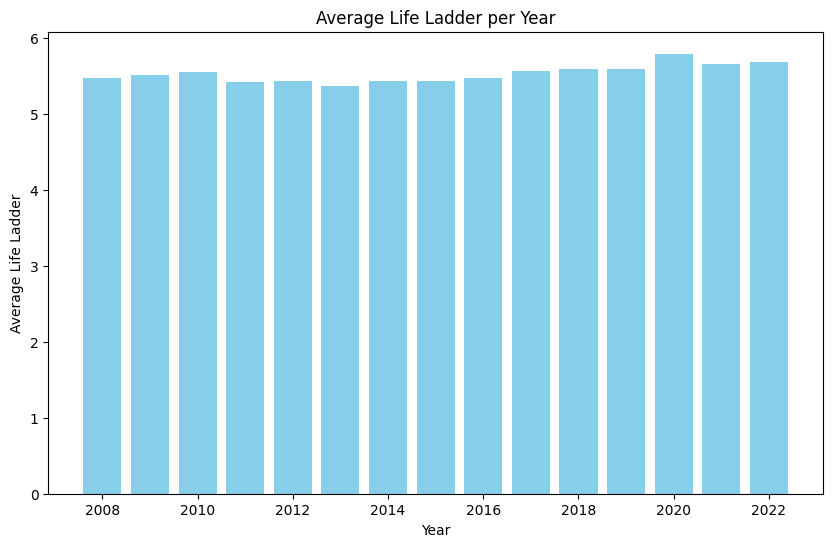

In [4]:
# Filter countries with less than 10 years of data
years_per_country = merged_data['Country name'].value_counts()
countries_to_keep = years_per_country[years_per_country >= 10].index
merged_data = merged_data[merged_data['Country name'].isin(countries_to_keep)]



# Displaying the first few rows of the merged dataset
merged_data.head()

#life ladder for every year
average_ladder_per_year = clean_data.groupby('year')['Life Ladder'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(average_ladder_per_year['year'], average_ladder_per_year['Life Ladder'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Average Life Ladder')
plt.title('Average Life Ladder per Year')
plt.show()

In [5]:
box_chart = alt.Chart(merged_data).mark_boxplot().encode(
    x='sub-region:N',
    y='Life Ladder:Q',
    tooltip=['sub-region:N', 'Life Ladder:Q'],
).properties(
    width=600,
    height=400,
    title='Distribution of Life Ladder for Each Sub-region'
)

# Show the box chart
box_chart


alt.Chart(...)

In [6]:
# Calculate the improvement in Life Ladder for each sub-region
improvement_data = clean_data.groupby(['sub-region', 'Country name']).agg(
    initial_life_ladder=('Life Ladder', 'first'),
    final_life_ladder=('Life Ladder', 'last')
).reset_index()

improvement_data['improvement'] = improvement_data['final_life_ladder'] - improvement_data['initial_life_ladder']

# Create the Altair bar chart
bar_chart = alt.Chart(improvement_data).mark_bar().encode(
    x='sub-region:N',
    y='mean(improvement):Q',
    tooltip=['sub-region:N', 'mean(improvement):Q'],
).properties(
    width=600,
    height=400,
    title='Average Improvement in Life Ladder for Each Sub-region'
)

# Show the bar chart
bar_chart


alt.Chart(...)

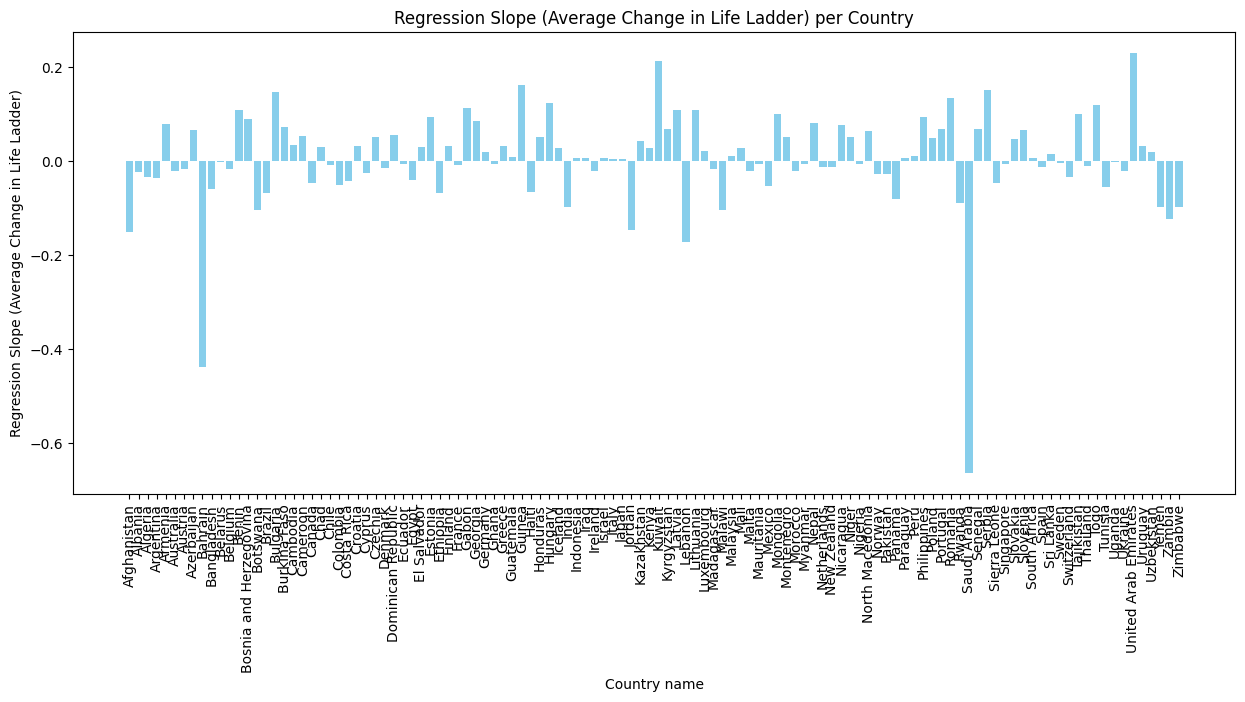

In [7]:
regression_results = {}

for country, group in clean_data.groupby('Country name'):
    X = sm.add_constant(group['year'])
    y = group['Life Ladder']

    model = sm.OLS(y, X).fit()
    regression_results[country] = model.params['year']

# Convert regression results to a DataFrame
slope_df = pd.DataFrame(list(regression_results.items()), columns=['Country name', 'Regression Slope'])

# Plotting the graph
plt.figure(figsize=(15, 6))
plt.bar(slope_df['Country name'], slope_df['Regression Slope'], color='skyblue')
plt.xlabel('Country name')
plt.ylabel('Regression Slope (Average Change in Life Ladder)')
plt.title('Regression Slope (Average Change in Life Ladder) per Country')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

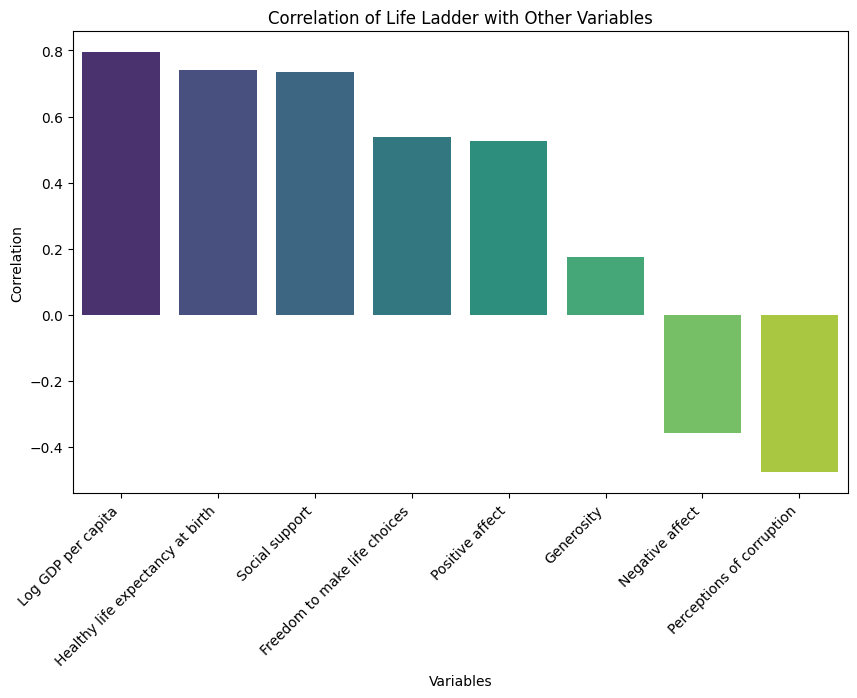

In [8]:
import seaborn as sns
# Select relevant columns for correlation analysis
correlation_data = clean_data[['Life Ladder', 'Log GDP per capita', 'Social support',
                                  'Healthy life expectancy at birth', 'Freedom to make life choices',
                                  'Generosity', 'Perceptions of corruption', 'Positive affect', 'Negative affect']]

# Calculate correlation matrix
correlation_matrix = correlation_data.corr()

# Extract correlations between Life Ladder and other variables
life_ladder_correlations = correlation_matrix['Life Ladder'].drop('Life Ladder')

# Sort correlations in descending order
sorted_correlations = life_ladder_correlations.sort_values(ascending=False)

# Create a bar chart to visualize correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_correlations.index, y=sorted_correlations.values, hue=sorted_correlations.index, legend=False, palette='viridis')
plt.title('Correlation of Life Ladder with Other Variables')
plt.xlabel('Variables')
plt.ylabel('Correlation')
plt.xticks(rotation=45, ha='right')
plt.show()


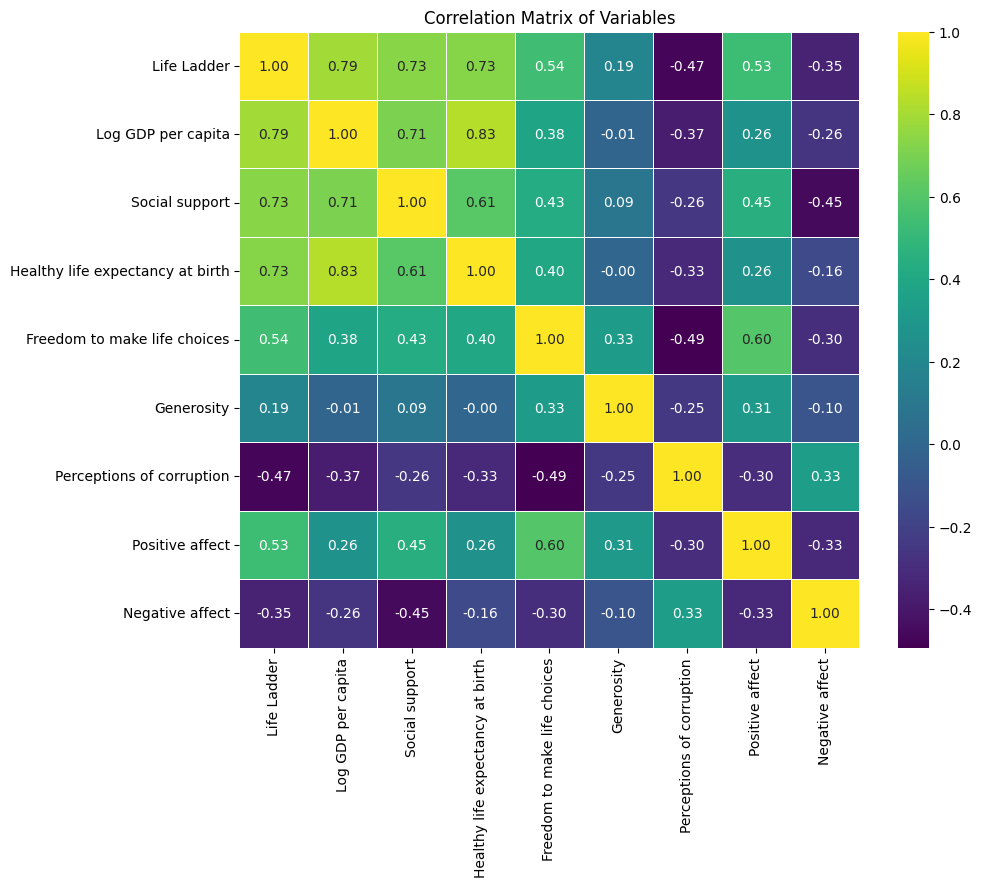

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns for correlation analysis
correlation_data = merged_data[['Life Ladder', 'Log GDP per capita', 'Social support',
                                  'Healthy life expectancy at birth', 'Freedom to make life choices',
                                  'Generosity', 'Perceptions of corruption', 'Positive affect', 'Negative affect']]

# Calculate correlation matrix
correlation_matrix = correlation_data.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Variables')
plt.show()

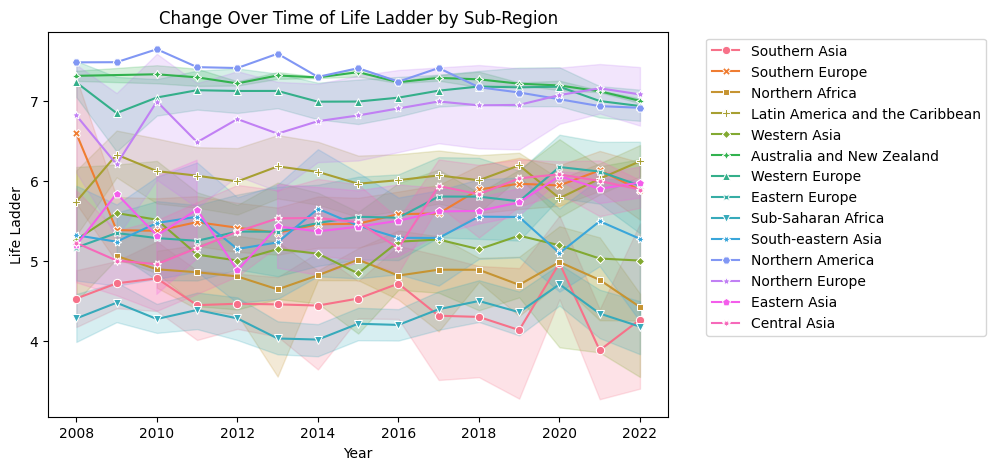

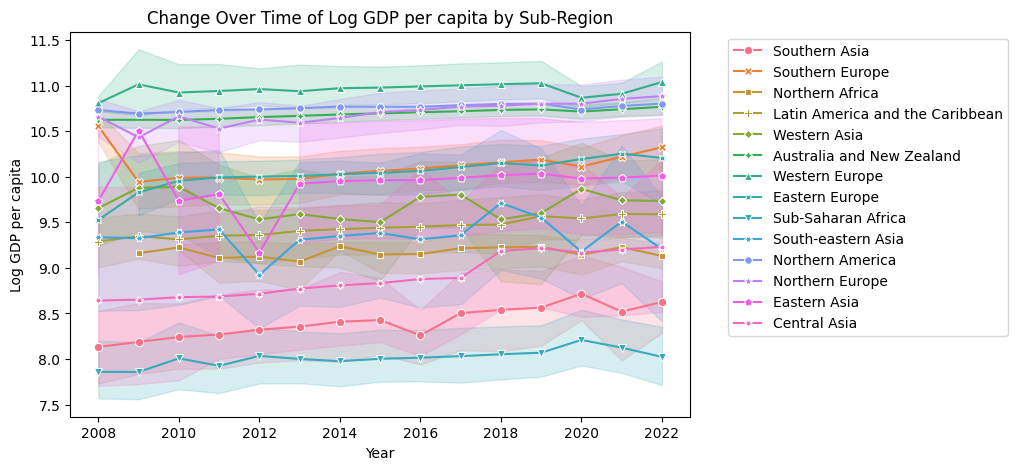

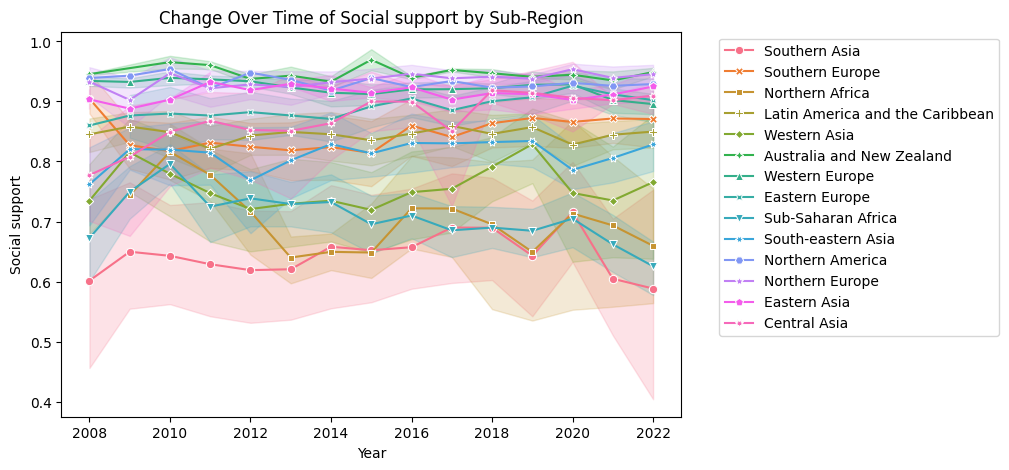

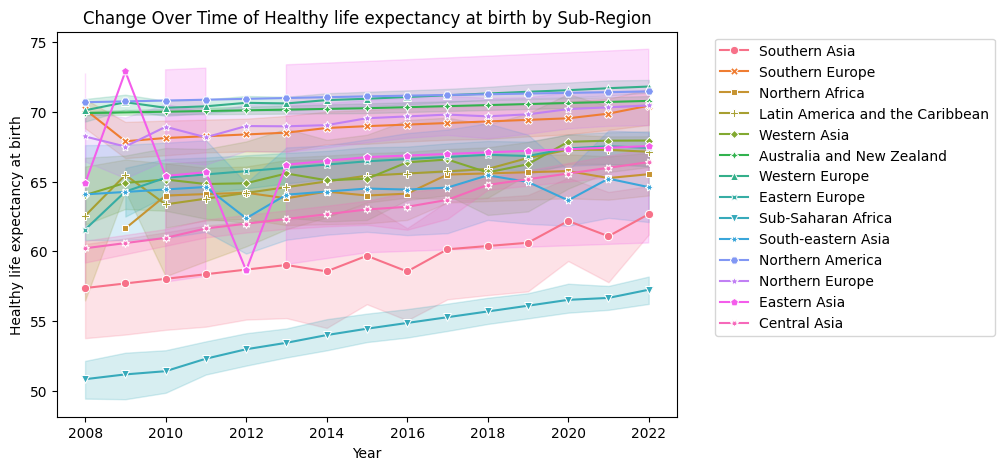

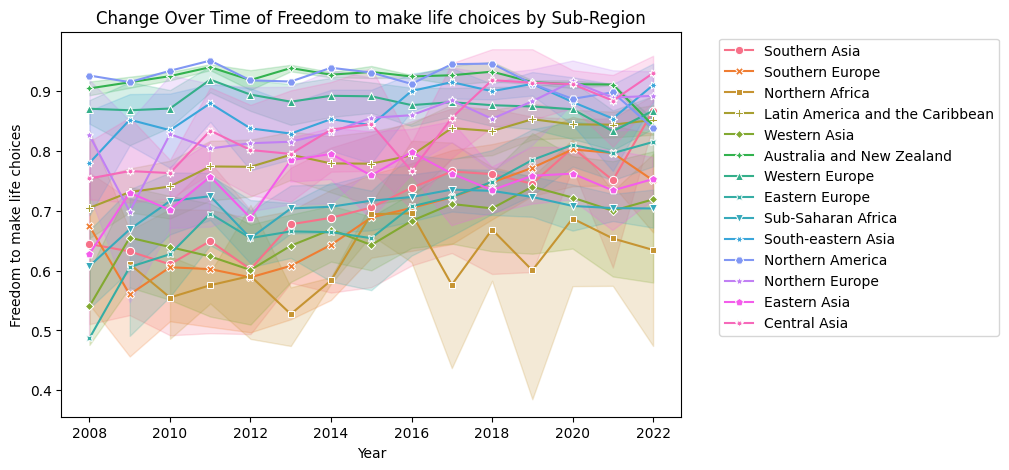

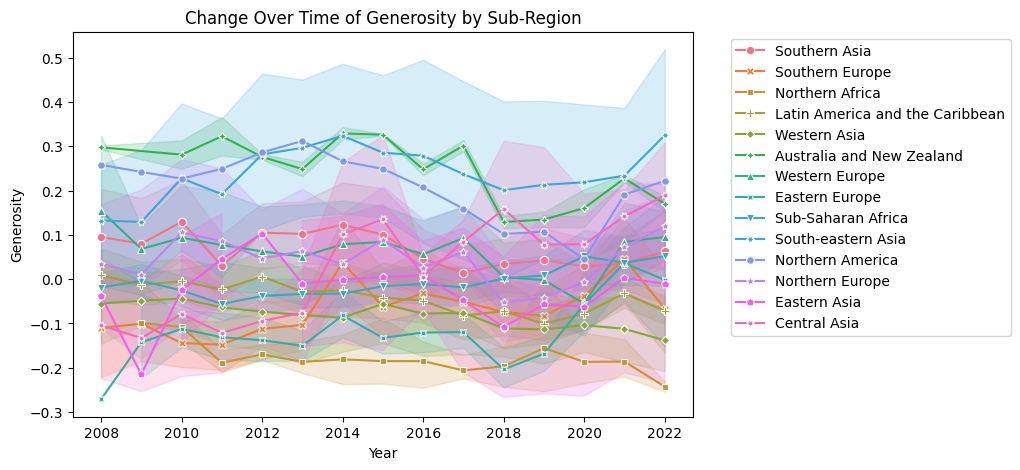

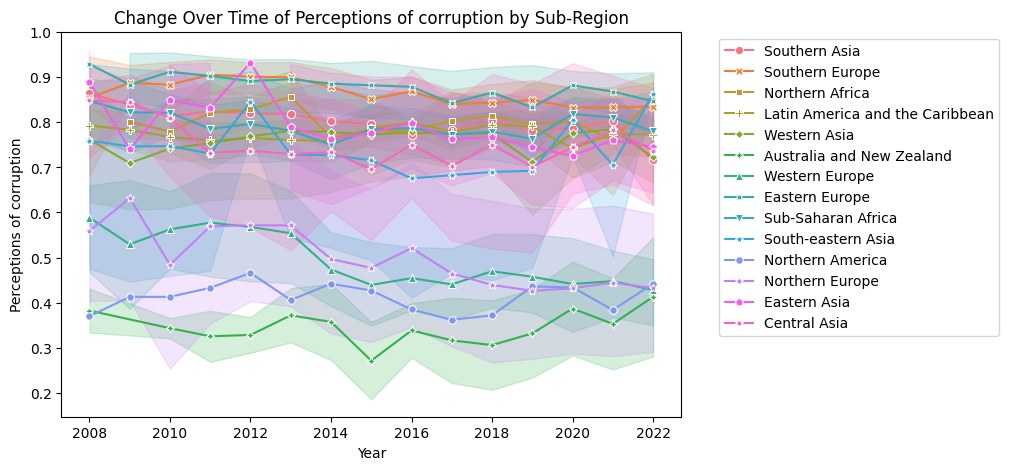

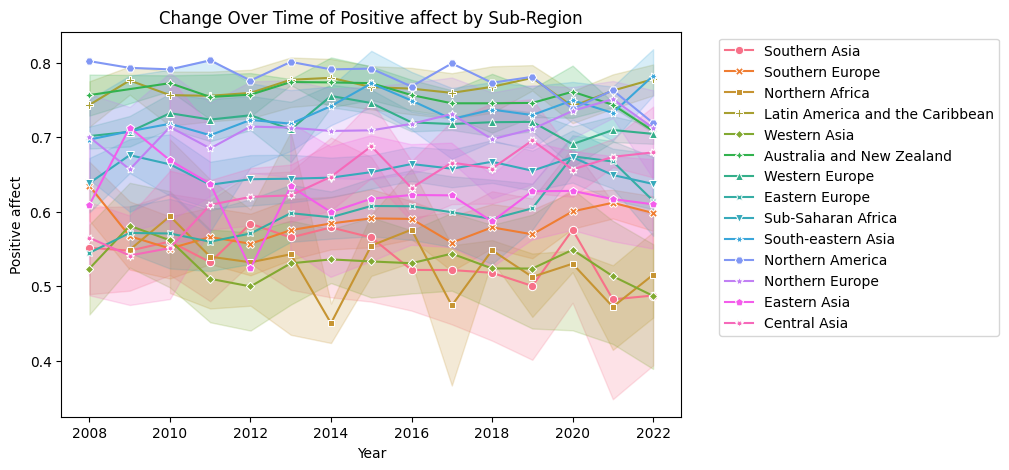

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Select relevant columns for the analysis
time_series_data = clean_data[['year', 'Life Ladder', 'Log GDP per capita', 'Social support',
                               'Healthy life expectancy at birth', 'Freedom to make life choices',
                               'Generosity', 'Perceptions of corruption', 'Positive affect', 'Negative affect', 'sub-region']]

# List of variables to create separate plots
variables_to_plot = ['Life Ladder', 'Log GDP per capita', 'Social support',
                     'Healthy life expectancy at birth', 'Freedom to make life choices',
                     'Generosity', 'Perceptions of corruption', 'Positive affect', 'Negative affect']

# Create separate line plots for each variable
for variable in variables_to_plot:
    plt.figure(figsize=(8, 5))
    sns.lineplot(x='year', y=variable, hue='sub-region', style='sub-region', markers=True, dashes=False, data=time_series_data)
    plt.title(f'Change Over Time of {variable} by Sub-Region')
    plt.xlabel('Year')
    plt.ylabel(variable)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
    plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
# pre-covid vs post_covid
pre_pandemic_data = regional_data[regional_data['year'] <= 2018]
post_pandemic_data = regional_data[regional_data['year'] >= 2019]

# Calculating the average values for each period and region
avg_pre_pandemic = pre_pandemic_data.groupby('sub-region').mean().reset_index()
avg_post_pandemic = post_pandemic_data.groupby('sub-region').mean().reset_index()

# Merging the data for comparison
comparison_data = avg_pre_pandemic.merge(avg_post_pandemic, on='sub-region', suffixes=('_pre', '_post'))

# Calculating percentage change for each variable
comparison_columns = ['Life Ladder', 'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth',
                      'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 
                      'Positive affect', 'Negative affect']

comparison_results = pd.DataFrame()

for col in comparison_columns:
    comparison_results[col + ' Change (%)'] = ((comparison_data[col + '_post'] - comparison_data[col + '_pre']) 
                                               / comparison_data[col + '_pre']) * 100

comparison_results['sub-region'] = comparison_data['sub-region']
comparison_results = comparison_results.set_index('sub-region')

# Standardizing the changes
scaler = StandardScaler()
standardized_changes = scaler.fit_transform(comparison_results.iloc[:, :-1])
standardized_changes_df = pd.DataFrame(standardized_changes, columns=comparison_results.columns[:-1], 
                                       index=comparison_results.index)

# Calculating the composite score by taking the simple average of standardized changes
composite_score = standardized_changes_df.mean(axis=1)

# Ranking regions based on the composite score
composite_ranking = composite_score.sort_values(ascending=False)

# Preparing individual variable rankings including Life Ladder
individual_rankings = standardized_changes_df.rank(ascending=False).sort_values(by='Life Ladder Change (%)')

composite_ranking, individual_rankings.head()

# Plotting the composite ranking
plt.figure(figsize=(12, 8))
sns.barplot(x=composite_ranking, y=composite_ranking.index, palette="coolwarm")
plt.title('Composite Ranking of Regions Based on Changes Due to COVID-19')
plt.xlabel('Composite Score')
plt.ylabel('Region')
plt.show()

## Summary of findings

Certain regions and sub-regions have experienced significant improvements in happiness, while others have faced declines or stability. Oceania consistently ranks highest in average happiness factors, followed by Europe, the Americas, Asia, and Africa. Factors such as economic prosperity, social support, health, and freedom are positively associated with happiness, while perceptions of corruption have a negative impact. To precisely find the sub-regions which experienced the greatest increase and decrease in happiness levels, linear regression analysis was utilized to find the changes in happiness levels for each sub-region from 2008-2022.

Based on this we found that Central Asia experienced the greatest improvement while Northern America experienced the greatest declination. Our correlation analysis shows that the factors Log GDP per capita, Social support, and Healthy life expectancy at birth play the largest part in determining happiness levels (Life Ladder). Therefore, we can assume that Central Asia has also had an increase in these factors as well and conversely, Northern America has experienced a decrease in these factors.
